In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, plot_confusion_matrix
from sklearn.tree import plot_tree

from sklearn import preprocessing
#Import scikit-learn dataset library
from sklearn import datasets
# Import train_test_split function
from sklearn.model_selection  import train_test_split
#Import scikit-learn metrics module for accuracy calculation
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report
import category_encoders as ce
from category_encoders import TargetEncoder

### Data Creation

In [2]:
# # Set seed for reproducibility
# np.random.seed(42)

# # Generate synthetic data
# num_samples = 50

# age = np.random.randint(18, 65, size=num_samples)
# annual_income = np.random.randint(30000, 120000, size=num_samples)
# credit_history = np.random.choice(['Excellent', 'Good', 'Average', 'Poor'], size=num_samples)
# monthly_spending = np.random.randint(100, 3000, size=num_samples)
# # card_eligibility = np.random.choice(['Yes', 'No'], size=num_samples)
# card_eligibility = np.where(monthly_spending > 500, 'Yes', 'No')
# products_available = ['Electronics', 'Clothing', 'Books', 'Home Decor', 'Fitness', 'Stationary', 'Fitness']

# # Randomly assign a subset of available products to each user
# products_purchased = [np.random.choice(products_available, size=np.random.randint(1, 4)) for _ in range(num_samples)]

# products_str = [', '.join(products) for products in products_purchased]

# # Create DataFrame
# data = pd.DataFrame({
#     'Age': age,
#     'Annual_Income': annual_income,
#     'Credit_History': credit_history,
#     'Monthly_Spending': monthly_spending,
#     'Card_Eligibility': card_eligibility,
#     'Products_Available': products_str
# })

# # Display the first few rows of the generated dataset
# print(data.head(10))

# # Save the generated dataset to a CSV file
# data.to_csv('generated_dataset_50.csv', index=False)

In [3]:
# # Filter for transactional data (Card Eligibility is 'Yes' and users have made purchases)
# transactional_data = data['Products_Available']

# # Display the first few rows of the transactional dataset
# print(transactional_data.head())

# # Save the transactional dataset to a CSV file
# transactional_data.to_csv('transactional_dataset.csv', index=False)


### Modelling without condition

In [17]:
# Reading data
df_1 = pd.read_csv('generated_dataset_50_new.csv')
df_1.head()

,Age,Annual_Income,Credit_History,Monthly_Spending,Card_Eligibility,Products_Available
0,56,53483,Excellent,1584,Yes,"Stationary, Fitness, Home Decor"
1,46,78555,Poor,963,Yes,"Stationary, Stationary"
2,32,47159,Average,2890,No,"Fitness, Electronics, Electronics"
3,60,110077,Average,663,No,"Stationary, Fitness, Books"
4,25,65920,Excellent,1120,No,"Home Decor, Books, Clothing"


In [18]:
df_1 = df_1.drop('Products_Available', axis=1)
df_1

,Age,Annual_Income,Credit_History,Monthly_Spending,Card_Eligibility
0,56,53483,Excellent,1584,Yes
1,46,78555,Poor,963,Yes
2,32,47159,Average,2890,No
3,60,110077,Average,663,No
4,25,65920,Excellent,1120,No
5,38,97121,Average,195,No
6,56,99479,Excellent,2023,Yes
7,36,119475,Good,1857,No
8,40,49457,Average,2632,Yes
9,28,96557,Good,2378,No


### Decision Tree

In [26]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_1['Credit_History'] = label_encoder.fit_transform(df_1['Credit_History'])

# Define features (X) and target variable (y)
X = df_1[['Age', 'Annual_Income', 'Credit_History', 'Monthly_Spending']]
y = df_1['Card_Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.70
Classification Report:
               precision    recall  f1-score   support

          No       0.67      0.50      0.57         4
         Yes       0.71      0.83      0.77         6

    accuracy                           0.70        10
   macro avg       0.69      0.67      0.67        10
weighted avg       0.70      0.70      0.69        10

Confusion Matrix:
 [[2 2]
 [1 5]]


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


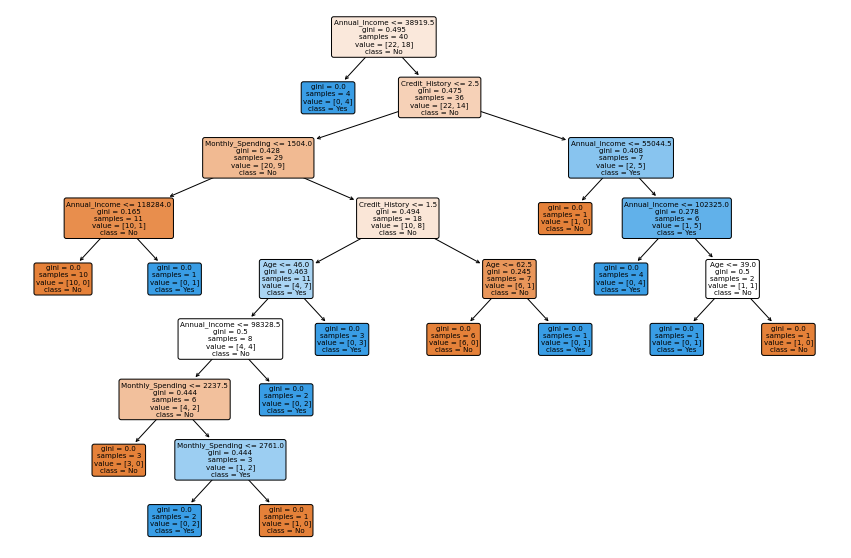

In [20]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()

## SVM

In [27]:
from sklearn.svm import SVC
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
df_1['Credit_History'] = label_encoder.fit_transform(df_1['Credit_History'])

# Define features (X) and target variable (y)
X = df_1[['Age', 'Annual_Income', 'Credit_History', 'Monthly_Spending']]
y = df_1['Card_Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) model
model = SVC(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 0.40
Classification Report:
               precision    recall  f1-score   support

          No       0.40      1.00      0.57         4
         Yes       0.00      0.00      0.00         6

    accuracy                           0.40        10
   macro avg       0.20      0.50      0.29        10
weighted avg       0.16      0.40      0.23        10

Confusion Matrix:
 [[4 0]
 [6 0]]


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/me

### Model Perfromance with condition 

In [4]:
# Reading data
df = pd.read_csv('generated_dataset_50.csv')
df.head()

,Age,Annual_Income,Credit_History,Monthly_Spending,Card_Eligibility,Products_Available
0,56,53483,Excellent,1584,Yes,"Books, Stationary, Electronics"
1,46,78555,Poor,963,Yes,Stationary
2,32,47159,Average,2890,Yes,Clothing
3,60,110077,Average,663,Yes,"Fitness, Clothing"
4,25,65920,Excellent,1120,Yes,"Electronics, Fitness, Electronics"


In [5]:
df.isnull().sum()

Age                   0
Annual_Income         0
Credit_History        0
Monthly_Spending      0
Card_Eligibility      0
Products_Available    0
dtype: int64

In [6]:
df.columns

Index(['Age', 'Annual_Income', 'Credit_History', 'Monthly_Spending',
       'Card_Eligibility', 'Products_Available'],
      dtype='object')

In [7]:
df = df.drop('Products_Available', axis=1)
df

,Age,Annual_Income,Credit_History,Monthly_Spending,Card_Eligibility
0,56,53483,Excellent,1584,Yes
1,46,78555,Poor,963,Yes
2,32,47159,Average,2890,Yes
3,60,110077,Average,663,Yes
4,25,65920,Excellent,1120,Yes
5,38,97121,Average,195,No
6,56,99479,Excellent,2023,Yes
7,36,119475,Good,1857,Yes
8,40,49457,Average,2632,Yes
9,28,96557,Good,2378,Yes


### Decision Tree

In [25]:
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Credit_History'] = label_encoder.fit_transform(df['Credit_History'])

# Define features (X) and target variable (y)
X = df[['Age', 'Annual_Income', 'Credit_History', 'Monthly_Spending']]
y = df['Card_Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a DecisionTreeClassifier model
model = DecisionTreeClassifier(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         Yes       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[10]]


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [9]:
# # Calculate confusion matrix
# cm = confusion_matrix(y_test, predictions)
# cm
# # # Plot the confusion matrix

# # disp = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_, cmap=plt.cm.Blues)
# # disp.ax_.set_title('Confusion Matrix')
# # plt.show()

In [10]:
X_train.head()

,Age,Annual_Income,Credit_History,Monthly_Spending
12,53,82995,0,640
4,25,65920,1,1120
37,54,38571,1,2780
8,40,49457,0,2632
3,60,110077,0,663


In [11]:
X_test.head()

,Age,Annual_Income,Credit_History,Monthly_Spending
13,57,70757,1,1159
39,38,81214,0,1072
30,59,112798,1,1629
45,31,97563,0,748
17,19,101211,1,1919


In [12]:
y_train.head()

12    Yes
4     Yes
37    Yes
8     Yes
3     Yes
Name: Card_Eligibility, dtype: object

In [13]:
y_test.head()

13    Yes
39    Yes
30    Yes
45    Yes
17    Yes
Name: Card_Eligibility, dtype: object

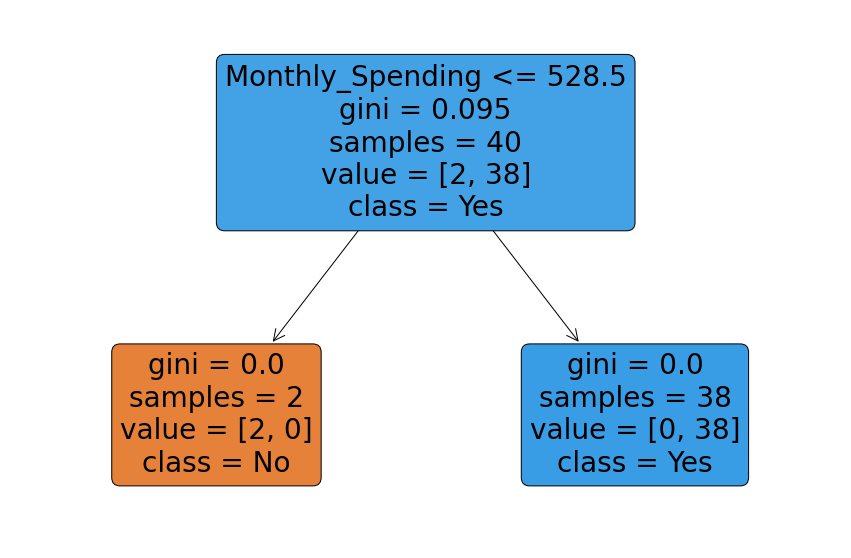

In [14]:
# Plot the decision tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, class_names=model.classes_, filled=True, rounded=True)
plt.show()

### SVM

In [28]:
from sklearn.svm import SVC
# Convert categorical features to numerical using LabelEncoder
label_encoder = LabelEncoder()
df['Credit_History'] = label_encoder.fit_transform(df['Credit_History'])

# Define features (X) and target variable (y)
X = df[['Age', 'Annual_Income', 'Credit_History', 'Monthly_Spending']]
y = df['Card_Eligibility']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Support Vector Machine (SVM) model
model = SVC(random_state=42)

# Train the model
model.fit(X_train, y_train)

# Make predictions on the test set
predictions = model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, predictions)
report = classification_report(y_test, predictions)
conf_matrix = confusion_matrix(y_test, predictions)
print(f'Accuracy: {accuracy:.2f}')
print('Classification Report:\n', report)
print('Confusion Matrix:\n', conf_matrix)

Accuracy: 1.00
Classification Report:
               precision    recall  f1-score   support

         Yes       1.00      1.00      1.00        10

    accuracy                           1.00        10
   macro avg       1.00      1.00      1.00        10
weighted avg       1.00      1.00      1.00        10

Confusion Matrix:
 [[10]]


/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
/Users/vamsigontu/opt/anaconda3/lib/python3.9/site-packages/sklearn/utils/validation.py:623: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():


In [16]:
# # Calculate confusion matrix
# cm = confusion_matrix(y_test, predictions)
# # Plot the confusion matrix
# disp = plot_confusion_matrix(model, X_test, y_test, display_labels=model.classes_, cmap=plt.cm.Blues)
# disp.ax_.set_title('Confusion Matrix')
# plt.show()

### 2nd Part

w: [-0.3335 -0.6665]
b: 3.6668333333333343


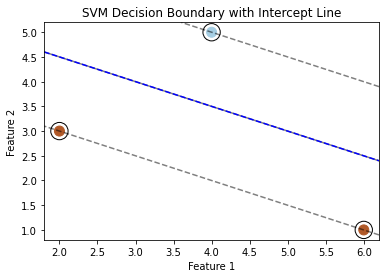

In [47]:
import matplotlib.pyplot as plt
import numpy as np

# Given support vectors and labels
X = np.array([[2, 3], [4, 5], [6, 1]])
y = np.array([1, -1, 1])

# Create an SVM model
model = svm.SVC(kernel='linear', C=float('inf'))
model.fit(X, y)

# Get the coefficients (w) and intercept (b) from the model
w = model.coef_[0]
b = model.intercept_[0]
print('w:',w)
print('b:',b)
# Plotting the points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired, marker='o', s=100)

# Plotting the separating line
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()

xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 50),
                     np.linspace(ylim[0], ylim[1], 50))
Z = model.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])

# Highlight the support vectors
plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=300,
            linewidth=1, facecolors='none', edgecolors='k')

# Plotting the intercept line
slope = -w[0] / w[1]
intercept_line = lambda x: slope * x - (b / w[1])
plt.plot(np.linspace(xlim[0], xlim[1], 50), intercept_line(np.linspace(xlim[0], xlim[1], 50)), '--', color='blue')

plt.title('SVM Decision Boundary with Intercept Line')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()
